# VGG16 model from Keras and transfer learning

In [10]:
%apt-get update && apt-get install -y python3-opencv
%pip install opencv-python
%pip install matplotlib
%pip install wandb


UsageError: Line magic function `%apt-get` not found.


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

import wandb
from wandb.keras import WandbCallback

wandb.init(project='vgg16-transfer-learning', entity='picklerick')

#---------------HYPERPARAMETERS--------------------
WEIGHTS = 'imagenet'
INLCUDE_TOP = True
OPTIMIZER = 'sgd'
LOSS_FUNCTION = 'categorical_crossentropy'

wandb.config = {
  'include_top': INLCUDE_TOP, 
  'weights': WEIGHTS,
  'optimizer': OPTIMIZER,
  'loss_function': LOSS_FUNCTION,
}

## Load base model 

In [12]:
base_model = tf.keras.applications.VGG16(weights=WEIGHTS, include_top=INLCUDE_TOP)
print(base_model)
for index, layer in enumerate(base_model.layers):
    print(index, layer.name, layer.output_shape)

0 input_3 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


## Load image and resize to input of VGG16

In [13]:
image = cv2.resize(cv2.imread('locomotive.jpg'), (224,224))
im = np.expand_dims(image,axis=0)

## Predict class of input image

1/1 [==============================] - 1s 1s/step
Output of the network:  [[2.48821103e-11 4.48953513e-11 8.31152334e-12 4.75979716e-12
  1.05436493e-11 3.71735281e-10 1.17993268e-10 2.52198817e-10
  1.36157502e-10 7.96884225e-10 2.84970408e-10 1.94073924e-11
  3.11052226e-11 6.22024265e-10 3.25755534e-11 6.45198672e-10
  2.17111329e-11 2.79952953e-11 1.17776067e-10 3.31600615e-11
  3.17196991e-10 4.95575369e-12 1.75624792e-10 2.14586615e-09
  1.41922876e-10 7.46508549e-11 3.76213852e-11 1.99359987e-10
  8.37903288e-11 1.64787576e-11 4.35238040e-10 4.70766759e-11
  5.29162998e-11 9.07772468e-12 9.85445232e-12 2.02842340e-10
  1.84731619e-10 2.36239750e-10 2.94405222e-10 1.11644394e-09
  2.23285820e-10 4.72477002e-10 1.77033214e-11 1.72201212e-11
  8.08178732e-11 1.04786166e-10 2.77430356e-10 6.59445207e-11
  3.70676580e-11 7.64480753e-12 2.26260872e-12 1.42079482e-09
  4.53826299e-12 1.00489487e-11 4.20224723e-11 4.32746998e-11
  3.79366330e-11 4.17991232e-11 1.83790441e-10 1.17223791e

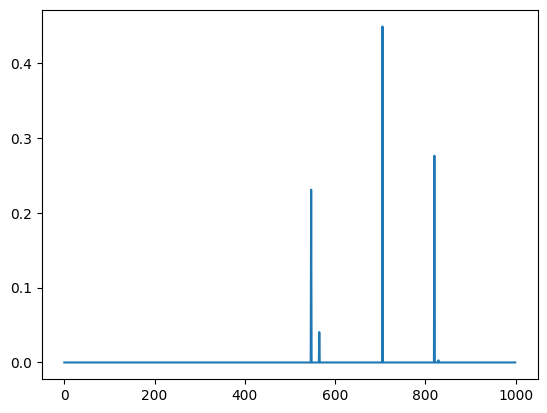

In [14]:
out = base_model.predict(im)
index = np.argmax(out)
print('Output of the network: ',out)
print('Top class prediction: ',index)

plt.plot(out.ravel())
plt.show()